# Imports

In [178]:
from __future__ import absolute_import, division, print_function
import sys
import os
import glob

from skimage.io import imread
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import cv2

import numpy as np

from sklearn.model_selection import train_test_split
import keras

# Our Preprocessing module----
sys.path.append('..')
from defectfinder import preprocessing as pre

In [19]:
from skimage.io import imsave
from skimage.color import rgb2gray
from skimage.util import random_noise
from keras.preprocessing.image import ImageDataGenerator, img_to_array

import matplotlib.pyplot as plt

# Generating all the augmented images along with the noise for all the defect types at once - 

In [139]:
# the path of the folder (Multislice) which includes different type of (theoretical) defects
theo_path = ".././Multislice"
folders=os.listdir(theo_path) 
# folders is the list of subfolders' names (here it is the types of defects' names:Mo,Sw,Vs2,Vw,W2S2,Ws)

for folder in folders:  #traversing all subfolders(types of defects) in MULTISLICE
    if '.' in folder:   #make sure it will not traverse file like '.DS_store'
        continue
        
    path = theo_path +"/"+folder
    
    files = os.listdir(path)
    #files is the list of all raw_images under each type of defect
    for file in files: #traversing all raw_images in the defect folders
        if file.endswith(".png"):
            img = imread(path+'/'+file, as_grey = True) # loading the image
            pre.AugmentImage(img, theo_path, folder+'_Augmented2', folder, 20) # Augmenting using the function above
    
    
    noisy_path = ".././Multislice"+"/"+folder+'/'+folder+'_Augmented2'  
    # the path of data_Augmented folder
    image=os.listdir(noisy_path)
    # image is the list all the augmented data
    for i in image:
        if i.endswith(".png"):
            img = imread(noisy_path+'/'+i, as_grey = True)
            pre.AddNoiseImage(img, folder, noisy_path, i)   #for each augmented image generate 4 images with gaussion,s&p,poisson and speckle noise
            
        else: 
            pass
        
       

/Applications/miniconda3/envs/keras/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


# Add more noise

In [141]:
theo_path = ".././Multislice"
#os.path.exists(theo_path)

folders=os.listdir(theo_path) 
for folder in folders:  #traversing all subfolders(types of defects) in MULTISLICE
    if '.' in folder:   #make sure it will not traverse file like '.DS_store'
        continue
        
    path = theo_path +"/"+folder
    
    files = os.listdir(path)
    #files is the list of all raw_images under each type of defect
    for file in files: #traversing all raw_images in the defect folders
        if file.endswith(".png"):
            img = imread(path+'/'+file, as_grey = True) # loading the image
            pre.AugmentImage(img, theo_path, folder+'_Augmented2', folder, 200) # Augmenting using the function above
    
        
    noisy_path = ".././Multislice"+"/"+folder+'/'+folder+'_Augmented2'  
    # the path of data_Augmented folder
    image=os.listdir(noisy_path)
    # image is the list all the augmented data
    for i in image:
        if i.endswith(".png"):
            img = imread(noisy_path+'/'+i, as_grey = True)
            AddCrazyNoise(img, noisy_path, i)   #for each augmented image generate 4 images with gaussion,s&p,poisson and speckle noise
            
        else: 
            pass
        
    

/Applications/miniconda3/envs/keras/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [137]:
def AddCrazyNoise(img,save_directory,image):
    assert isinstance(save_directory, str), ('Wrong Data type',
                                             'save_directory must be a string')
    assert isinstance(image, str), ('Wrong Data type',
                                    'image must be a string')
    if not os.path.exists(save_directory+'/noise'):
        os.makedirs(save_directory+'/noise')

    img_grey = rgb2gray(img)
    img_gauss = random_noise(img_grey, mode='gaussian', mean=0., var=0.2)
    img_sp = random_noise(img_grey, mode='s&p', salt_vs_pepper=0.5,amount=0.2)
    img_speckle = random_noise(img_grey, mode='speckle',mean=0.5,var=1)
    
    #randomly picked a image and add three noises again
    imglist=[img_gauss,img_sp,img_speckle]
    img_rand=imglist[np.random.randint(3)]
    img_gauss_mix = random_noise(img_rand, mode='gaussian', mean=0.0, var=0.1)
    img_sp_mix = random_noise(img_rand, mode='s&p', salt_vs_pepper=0.5,amount=0.1)
    img_speckle_mix = random_noise(img_rand, mode='speckle', mean=0.5, var=1)
    
    imsave(save_directory + '/noise/' + 'gauss_' + image, img_gauss)
    imsave(save_directory + '/noise/' + 's&p_' + image, img_sp)
    imsave(save_directory + '/noise/' + 'speckle' + image, img_speckle)
    imsave(save_directory + '/noise/' + 'gauss_mix_' + image, img_gauss_mix)
    imsave(save_directory + '/noise/' + 's&p_mix_' + image, img_sp_mix)
    imsave(save_directory + '/noise/' + 'speckle_mix' + image, img_speckle_mix)

    return

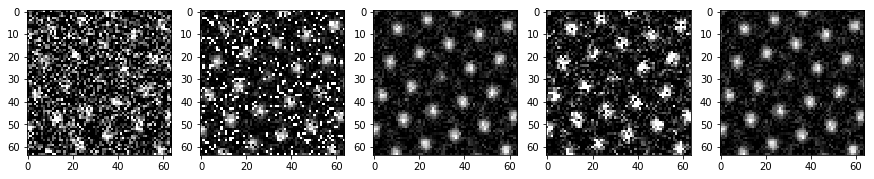

In [135]:
noisy_path=".././Multislice/Mo/Mo_Augmented/gauss_Mo_0_215.png"
img = imread(noisy_path, as_grey = True)
img_grey = rgb2gray(img)

f,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(15,25))
img_gauss = random_noise(img_grey, mode='gaussian', mean=0.0, var=0.2)
ax1.imshow(img_gauss,cmap='gray')

img_sp = random_noise(img_grey, mode='s&p', salt_vs_pepper=0.5,amount=0.2)
ax2.imshow(img_sp,cmap='gray')

img_poisson = random_noise(img_grey, mode='poisson')
ax3.imshow(img_poisson,cmap='gray')

img_speckle = random_noise(img_grey, mode='speckle', mean=0.5, var=1)
ax4.imshow(img_speckle,cmap='gray')

ax5.imshow(img_grey,cmap='gray')

(64, 64)

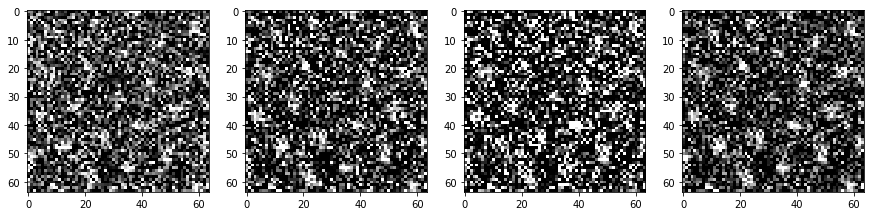

In [136]:

imglist=[img_gauss,img_sp,img_speckle]
img_rand=imglist[np.random.randint(3)]

f,(ax1,ax2,ax4,ax5)=plt.subplots(1,4,figsize=(15,25))
img_gauss_mix = random_noise(img_rand, mode='gaussian', mean=0.0, var=0.1)
ax1.imshow(img_gauss_mix,cmap='gray')

img_sp_mix = random_noise(img_rand, mode='s&p', salt_vs_pepper=0.5,amount=0.1)
ax2.imshow(img_sp_mix,cmap='gray')

img_speckle_mix = random_noise(img_rand, mode='speckle', mean=0.5, var=1)
ax4.imshow(img_speckle_mix,cmap='gray')

ax5.imshow(img_rand,cmap='gray')

# For augmenting individual defect types and adding noise separately, use the code below- 

### This is written to be used for adding additional defect types individually...

In [25]:
# the path of the folder (Multislice) which includes different type of (theoretical) defects
theo_path = '.././Multislice'

# Define path to the defect folder
path = '.././' + 'Multislice' + '/'

"""Change defect folder name here"""
folder = "Mo"

"""Change number of augmneted images here"""

N = 250 # Number of Augmented images (Total images after augmentation and adding noise will be ~5*N)

# Augmenting using the function
for filename in glob.iglob(path + folder + '/*.png'):
    
    img = load_img(filename, grayscale = True)
    
    pre.AugmentImage(img, theo_path, folder + '_Augmented2', folder , N)
    

# Adding noise to the augmented images

noisy_path = ".././Multislice"+"/"+folder+'/'+ folder+'_Augmented2'  

# the path of data_Augmented folder
image=os.listdir(noisy_path)

# image is the list all the augmented data
for i in image:
    if i.endswith(".png"):
        
        img = imread(noisy_path+'/'+i, as_grey = True)
        
        pre.AddNoiseImage(img, folder, noisy_path, i)   #for each augmented image generate 4 images with gaussion,s&p,poisson and speckle noise
            
    else: 
        pass

C:\Users\Sarthak\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


# Generate training and test dataset
## for all the augmented images with noise, save as numpy array
* Only 6 types of defects {'Sw':0,'Mo':1,'W2s2':2,'Vw':3,'Vs2':4,'Ws':5} are considered 
* x is not preprocessed(normalized or centered), y is converted into category

In [256]:
## read in all the augmented and noisy images
path = ".././Multislice"
folders=os.listdir(path) 
data=[]    #all the images will be stored in this list.
defecttype=[]    #all the defect type corresponding to each image store in this list
defects={'Sw':0,'Mo':1,'W2s2':2,'Vw':3,'Vs2':4,'Ws':5}     # each int represents a defect type

for folder in folders:  #traversing all subfolders(types of defects) in MULTISLICE
    if '.' in folder:   #make sure it will not traverse file like '.DS_store'
        continue
    
    noisy_path = ".././Multislice"+"/"+folder+'/'+folder+'_Augmented2/noise'
    filelist = glob.glob(noisy_path+'/*.png')
    data.extend([np.reshape(cv2.imread(fname, cv2.IMREAD_GRAYSCALE),(64,64,1)) for fname in filelist])
    defecttype.extend([defects[folder]]*len(filelist))

In [257]:
np.array(data).shape
# This is the total number of data we have

(50178, 64, 64, 1)

In [261]:
#train test split - 80% train and 20% test set

x_train, x_test, y_train, y_test = train_test_split(np.array(data), defecttype, test_size = 0.2, random_state = 28956)

y_train = keras.utils.to_categorical(y_train, len(defects))
y_test = keras.utils.to_categorical(y_test, len(defects))

# save the np array under .././dataset/dataset_noise
if not os.path.exists("../dataset/dataset_noise"):
    os.makedirs("../dataset/dataset_noise")
    
np.save("../dataset/dataset_noise/x_train.npy",x_train)
np.save("../dataset/dataset_noise/y_train.npy",y_train)
np.save("../dataset/dataset_noise/x_test.npy",x_test)
np.save("../dataset/dataset_noise/y_test.npy",y_test)